In [ ]:
#week 1
import pandas as pd 
# Loading the dataset 
df = pd.read_csv('student_performance_dataset.csv') 
# Displaying first few rows 
df.head(3000) 

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64


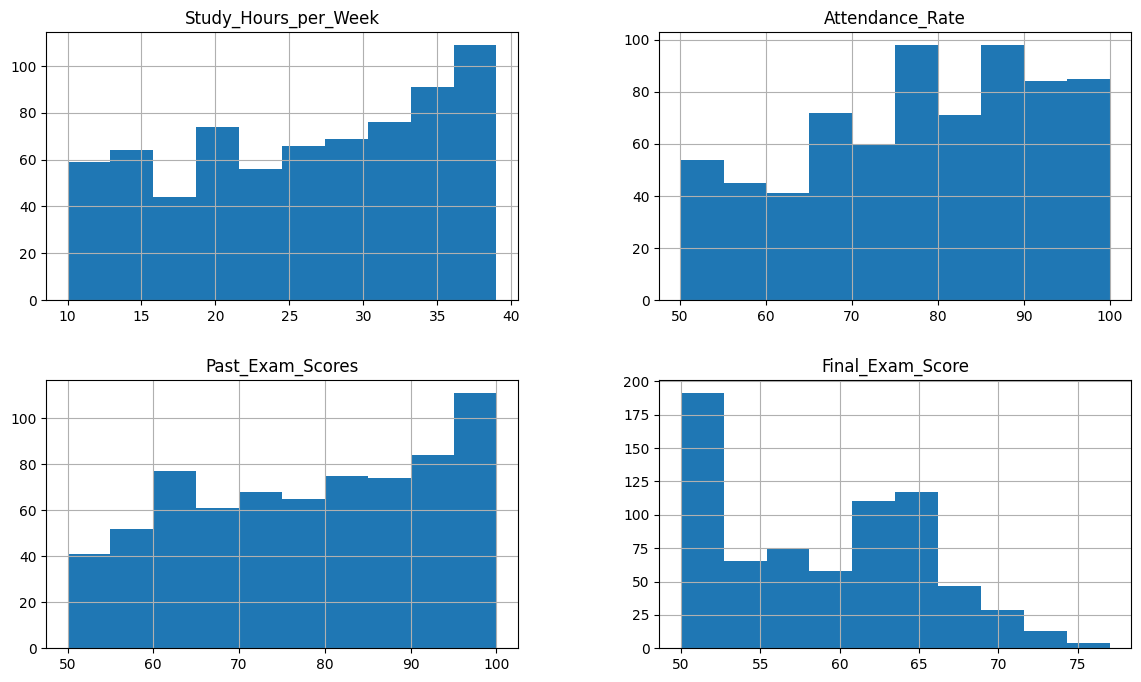

/nDatatypes:
Student_ID                     object
Gender                         object
Study_Hours_per_Week            int64
Attendance_Rate               float64
Past_Exam_Scores                int64
Parental_Education_Level       object
Internet_Access_at_Home        object
Extracurricular_Activities     object
Final_Exam_Score                int64
Pass_Fail                      object
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

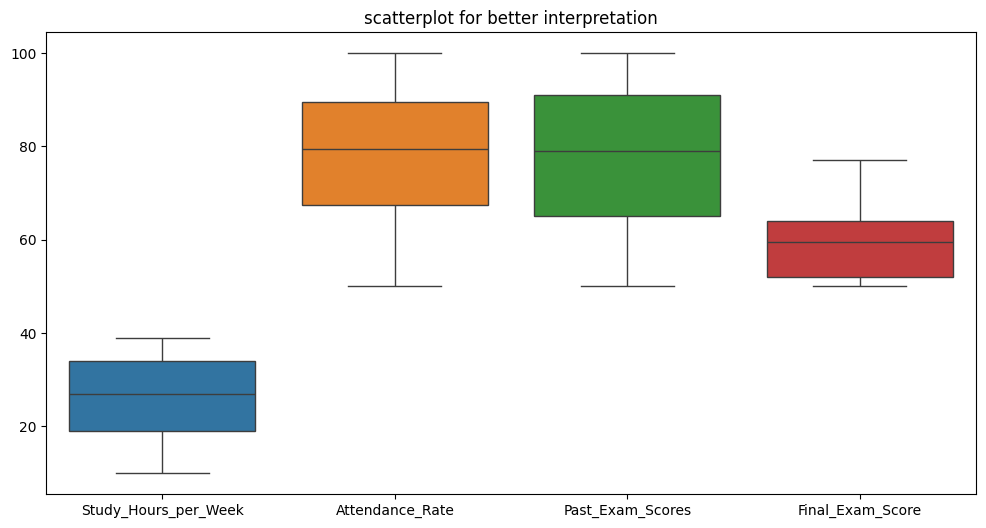

In [3]:
#week 2
import matplotlib.pyplot as plt 
import seaborn as sns 
# Check for missing values 
print(df.isnull().sum())
# Handling missing values (example: drop rows with missing values)
df=df.dropna()
# Visualize numerical distributions 
df.hist(figsize=(14,8)) 
plt.show()
#checking the datatypes
print("/nDatatypes:")
print (df.head(3000).dtypes)
#checking for incorrect datatypes(objects)
df.select_dtypes(include="object").head(3000)
#checking for incorrect datatypes(intergers)
df.select_dtypes(include="int64").head(3000)
#CHECKING FOR OUTLIERS
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("scatterplot for better interpretation")
plt.show


    Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  \
0         S147    Male                    31        68.267841   
1         S136    Male                    16        78.222927   
2         S209  Female                    21        87.525096   
3         S458  Female                    27        92.076483   
4         S078  Female                    37        98.655517   
..         ...     ...                   ...              ...   
703       S492    Male                    14        84.658761   
704       S301    Male                    35        60.278990   
705       S473    Male                    25        98.384969   
706       S307  Female                    21        96.148012   
707       S046  Female                    22        80.404392   

     Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home  \
0                  86              High School                     Yes   
1                  73                      PhD                      No 

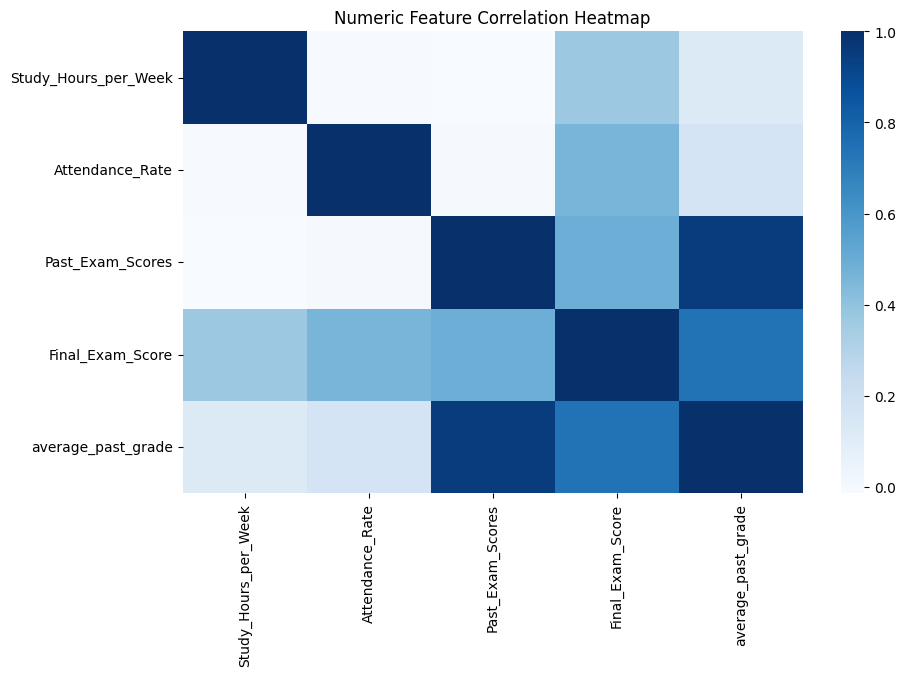

             Feature  Chi2 Score
410  Student_ID_S412  707.000000
239  Student_ID_S241  706.000000
325  Student_ID_S327  705.000000
167  Student_ID_S169  470.000000
99   Student_ID_S101  468.000000
..               ...         ...
34   Student_ID_S036    3.597403
480  Student_ID_S482    3.597403
6    Student_ID_S008    3.597403
4    Student_ID_S006    3.597403
0    Student_ID_S002    3.597403

[506 rows x 2 columns]
                Feature        VIF
4      Final_Exam_Score        inf
3      Past_Exam_Scores        inf
5    average_past_grade        inf
0                 const  85.393238
2       Attendance_Rate   1.532820
1  Study_Hours_per_Week   1.361329
X shape: (708, 510) y shape: (708,)
(354, 510)
(354,)
(354, 510)
(354,)


c:\Users\CRDB\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#week 3
df["average_past_grade"]= (df["Final_Exam_Score"]+ df["Past_Exam_Scores"])/2
print(df.head(3000))
num_data=df.select_dtypes(include='number')
category_data=df.select_dtypes(exclude='number')
print("num data column;", num_data.columns.tolist())
print("category columns;",category_data.columns.tolist())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(), annot=False, cmap="Blues")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Encoding categorical variables
cat_encoded = pd.get_dummies(category_data, drop_first=True)

# Performing feature selection
scaler = MinMaxScaler()
cat_scaled = scaler.fit_transform(cat_encoded)
chi_scores = chi2(cat_scaled, df["Final_Exam_Score"])
chi_results = pd.DataFrame({
    "Feature": cat_encoded.columns,
    "Chi2 Score": chi_scores[0]
})

print(chi_results.sort_values("Chi2 Score", ascending=False))
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
possible_targets = ['final_exam_score'] 
numeric_cols = [c for c in df.select_dtypes(include='number').columns if c not in possible_targets]
X = df[numeric_cols].copy()
import statsmodels.api as sm
X = sm.add_constant(X, has_constant='add')
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)
target_col = "Final_Exam_Score"  
if target_col not in df.columns:
    raise KeyError(f"Target column {target_col!r} not found. Available columns: {df.columns.tolist()}")
# Building features by dropping the target 
features = df.drop(columns=[target_col])
#Encode categorical features
X = pd.get_dummies(features, drop_first=True)
# Target vector
y = df[target_col]
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=84)

print("X shape:", X.shape, "y shape:", y.shape)
# ...existing code...
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#week 4
from sklearn.ensemble import RandomForestClassifier
#Training the model on the training dataset
model = RandomForestClassifier(n_estimators=2000, random_state=84)
model.fit(X_train, y_train) # - uses my 80% training data
#Making predictions on the test dataset. 
y_pred = model.predict(X_test)
print(y_pred[:2500])

[50 50 65 66 66 50 50 72 50 61 50 50 50 61 50 57 64 65 50 62 65 63 50 50
 71 50 62 50 66 50 50 50 50 67 64 64 50 64 64 50 50 61 67 50 71 50 62 60
 50 57 64 50 50 58 65 61 65 65 65 50 67 61 67 64 50 65 67 50 64 50 50 61
 62 50 55 67 50 50 50 50 60 50 65 59 50 50 60 69 50 61 59 64 66 67 65 67
 50 50 61 61 50 64 63 64 50 64 57 61 50 50 50 61 50 50 61 65 59 50 50 50
 65 61 50 59 50 50 65 62 60 50 50 60 63 65 50 62 67 65 50 64 50 50 61 61
 58 64 67 62 61 65 67 65 66 50 60 50 57 57 64 59 50 63 67 61 63 50 50 50
 61 57 57 71 69 61 66 50 63 50 50 61 67 66 50 65 61 50 63 65 50 65 50 71
 50 50 50 61 67 67 50 68 50 50 50 61 64 61 63 65 61 60 50 50 65 61 62 50
 50 50 61 59 55 66 50 50 50 61 50 63 60 61 50 50 61 60 65 60 50 65 50 50
 50 50 66 50 59 50 65 60 61 50 57 50 50 50 50 50 50 60 50 64 67 64 70 65
 50 67 50 50 50 61 50 55 50 65 50 63 69 50 50 50 50 50 50 50 59 50 65 50
 63 65 50 69 61 50 61 50 50 62 77 50 61 50 50 60 60 62 50 67 61 50 50 68
 61 61 60 59 60 65 50 61 65 60 65 57 50 61 60 50 50

In [ ]:
#week 5
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluating the model using accuracy, precision, recall, F1-score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred) #the accuracy is a bit low becuase the model might not be finidng a clear pattern to predict
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

#Summary
"""Its best performance was: 54% accuracy, 47% precision, 54% recall, and 47% F1 score. 
 This demonstrates that the model is highly prone to misclassifying instances into classes-both over-and under-identifying actual cases. 
 In general, these results show that the model is not reliable in the detection of patterns within the dataset, hence there is a need for further feature selection or tuning or using a different model altogether.
"""

Accuracy: 0.54
Precision: 0.47
Recall: 0.54
F1 Score: 0.47


'Its best performance was: 54% accuracy, 47% precision, 54% recall, and 47% F1 score. \n This demonstrates that the model is highly prone to misclassifying instances into classes-both over-and under-identifying actual cases. \n In general, these results show that the model is not reliable in the detection of patterns within the dataset, \n hence there is a need for further feature selection or tuning or using a different model altogether.\n'